In [63]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

In [29]:
df = pd.read_csv('weather_data.csv')
df.head()

,id,city,country,latitude,longitude,temperature,feels_like,temp_min,temp_max,pressure,...,weather_main,weather_description,wind_speed,wind_direction,clouds,visibility,sunrise,sunset,recorded_at,created_at
0,2,Warsaw,PL,52.2298,21.0118,2.82,2.82,2.13,3.84,1022,...,Clouds,overcast clouds,1.03,0,100,7000,2025-12-15 07:39:00,2025-12-15 15:23:20,2025-12-15 23:07:26,2025-12-15 23:07:44.339621
1,3,Krakow,PL,50.0833,19.9167,-0.81,-0.81,-1.89,-0.34,1021,...,Fog,fog,1.03,300,40,150,2025-12-15 07:32:47,2025-12-15 15:38:19,2025-12-15 23:04:41,2025-12-15 23:07:45.410771
2,4,Wrocław,PL,51.1000,17.0333,-0.09,-3.72,-1.00,0.58,1022,...,Mist,mist,3.13,127,1,5000,2025-12-15 07:49:11,2025-12-15 15:44:59,2025-12-15 23:03:49,2025-12-15 23:07:46.476707
3,5,Gdańsk,PL,54.3521,18.6464,3.39,-0.48,2.73,3.86,1018,...,Clouds,overcast clouds,4.63,230,100,6000,2025-12-15 08:00:22,2025-12-15 15:20:54,2025-12-15 23:03:38,2025-12-15 23:07:47.541691
4,6,Warsaw,PL,52.2298,21.0118,1.95,1.95,0.92,3.21,1022,...,Clouds,broken clouds,0.45,218,54,10000,2025-12-16 07:39:49,2025-12-16 15:23:27,2025-12-16 10:59:11,2025-12-16 11:03:58.784504


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   109 non-null    int64         
 1   city                 109 non-null    object        
 2   country              109 non-null    object        
 3   latitude             109 non-null    float64       
 4   longitude            109 non-null    float64       
 5   temperature          109 non-null    float64       
 6   feels_like           109 non-null    float64       
 7   temp_min             109 non-null    float64       
 8   temp_max             109 non-null    float64       
 9   pressure             109 non-null    int64         
 10  humidity             109 non-null    int64         
 11  weather_main         109 non-null    object        
 12  weather_description  109 non-null    object        
 13  wind_speed           109 non-null  

In [33]:
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])
df['recorded_at'] = pd.to_datetime(df['recorded_at'])
df['created_at'] = pd.to_datetime(df['created_at'])

## Data Visualization

In [57]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')  
plt.rcParams['font.family'] = 'Arial'  
plt.rcParams['figure.dpi'] = 100

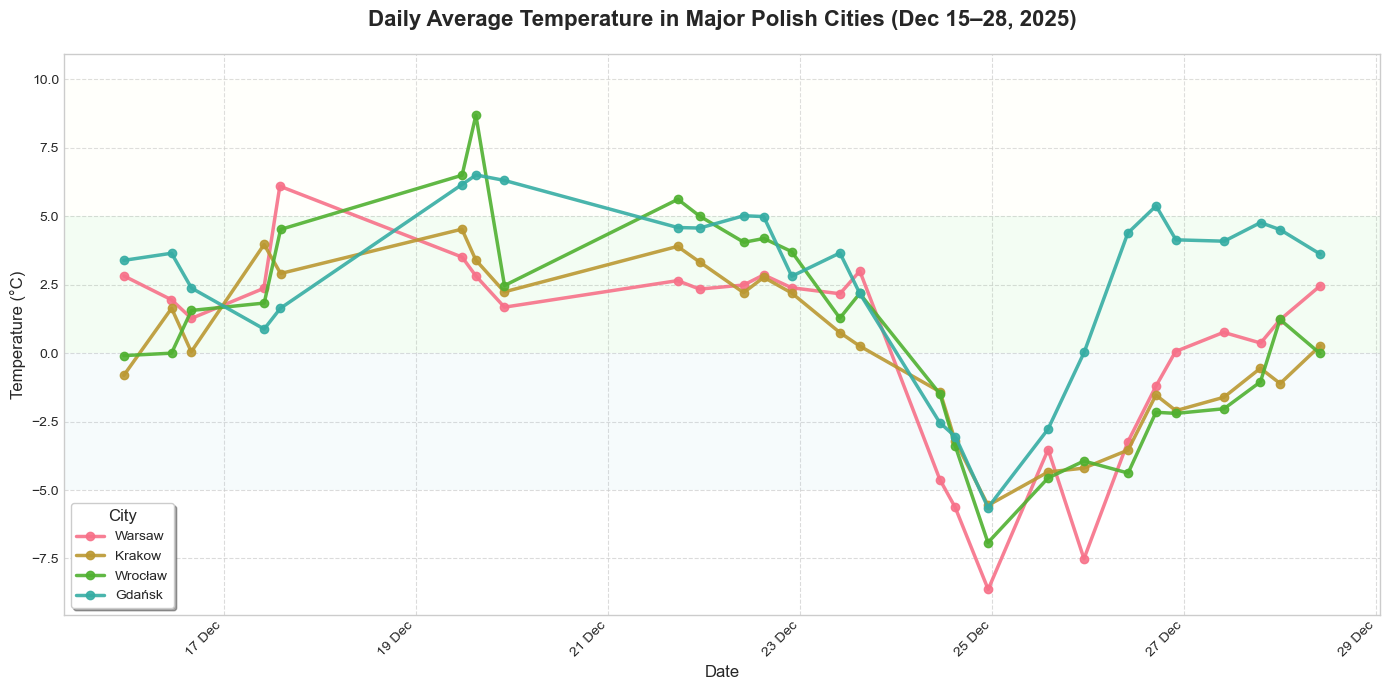

In [86]:
fig, ax = plt.subplots(figsize=(14, 7))

for city in df['city'].unique():
    city_df = df[df['city'] == city]
    daily_avg = city_df.groupby('recorded_at')['temperature'].mean()
    ax.plot(daily_avg.index, daily_avg, marker='o', linewidth=2.5, markersize=6, 
            label=city, alpha=0.9)

ax.set_title('Daily Average Temperature in Major Polish Cities (Dec 15–28, 2025)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.xaxis.set_major_formatter(DateFormatter('%d %b'))
plt.xticks(rotation=45, ha='right')
ax.legend(title='City', fontsize=10, title_fontsize=12, frameon=True, shadow=True)
ax.grid(True, linestyle='--', alpha=0.7)

ax.axhspan(-5, 0, facecolor='lightblue', alpha=0.1)
ax.axhspan(0, 5, facecolor='lightgreen', alpha=0.1)
ax.axhspan(5, 10, facecolor='lightyellow', alpha=0.1)

plt.tight_layout()
plt.show()

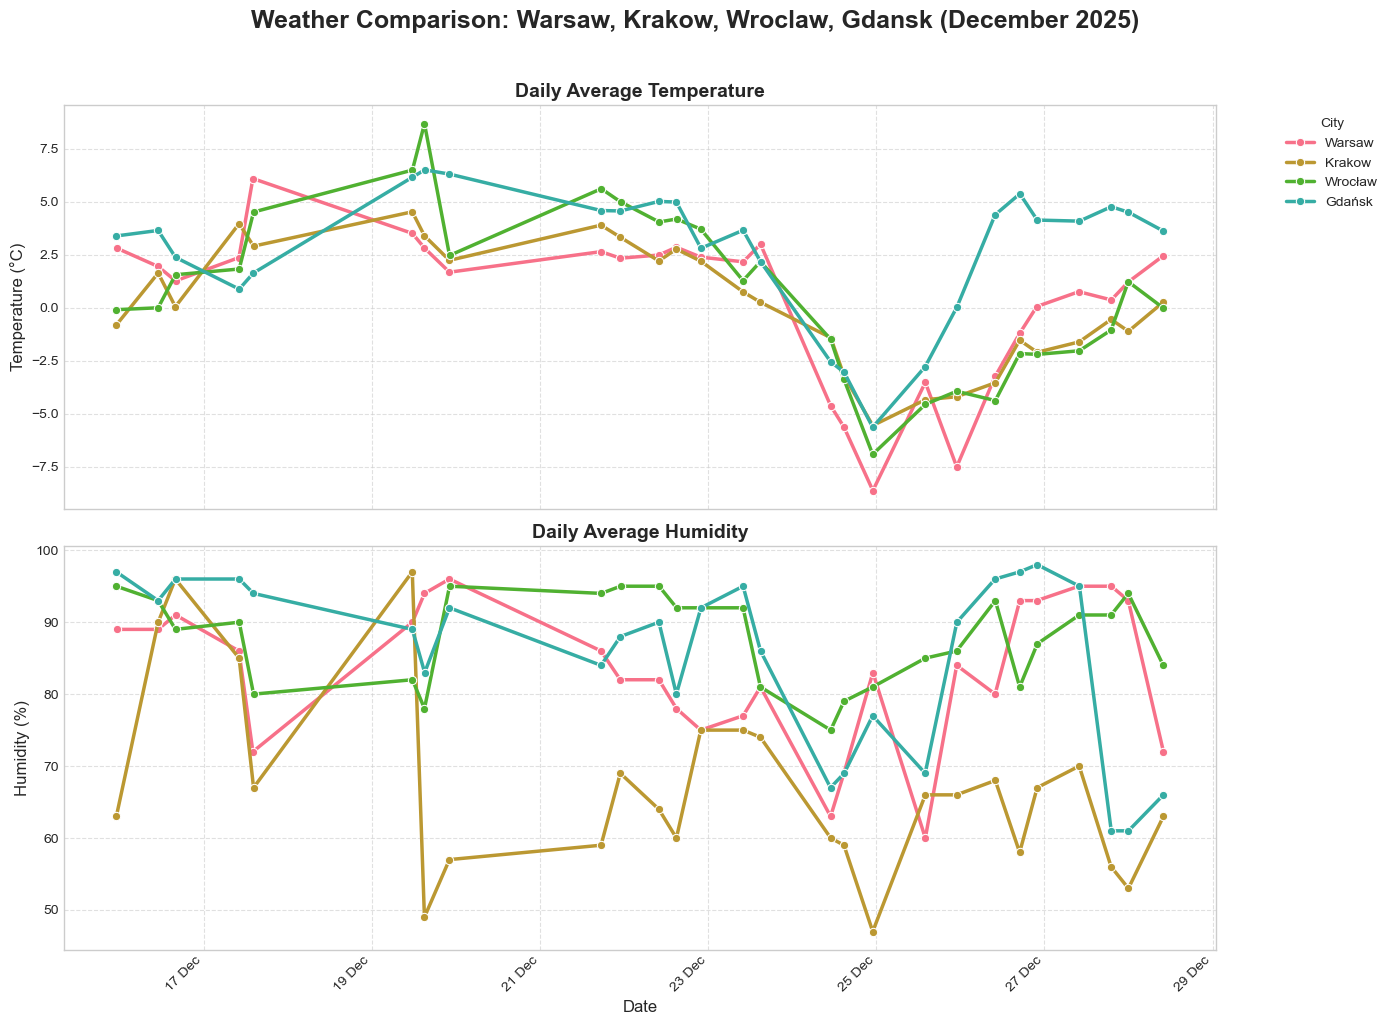

In [88]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Temperature
sns.lineplot(data=df, x='recorded_at', y='temperature', hue='city', 
             linewidth=2.5, marker='o', markersize=6, ax=ax1)
ax1.set_title('Daily Average Temperature', fontsize=14, fontweight='bold')
ax1.set_ylabel('Temperature (°C)', fontsize=12)
ax1.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')

# Humidity
sns.lineplot(data=df, x='recorded_at', y='humidity', hue='city', 
             linewidth=2.5, marker='o', markersize=6, ax=ax2)
ax2.set_title('Daily Average Humidity', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Humidity (%)', fontsize=12)
ax2.legend().set_visible(False)  # Upper legend is sufficient

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(DateFormatter('%d %b'))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Weather Comparison: Warsaw, Krakow, Wroclaw, Gdansk (December 2025)', 
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

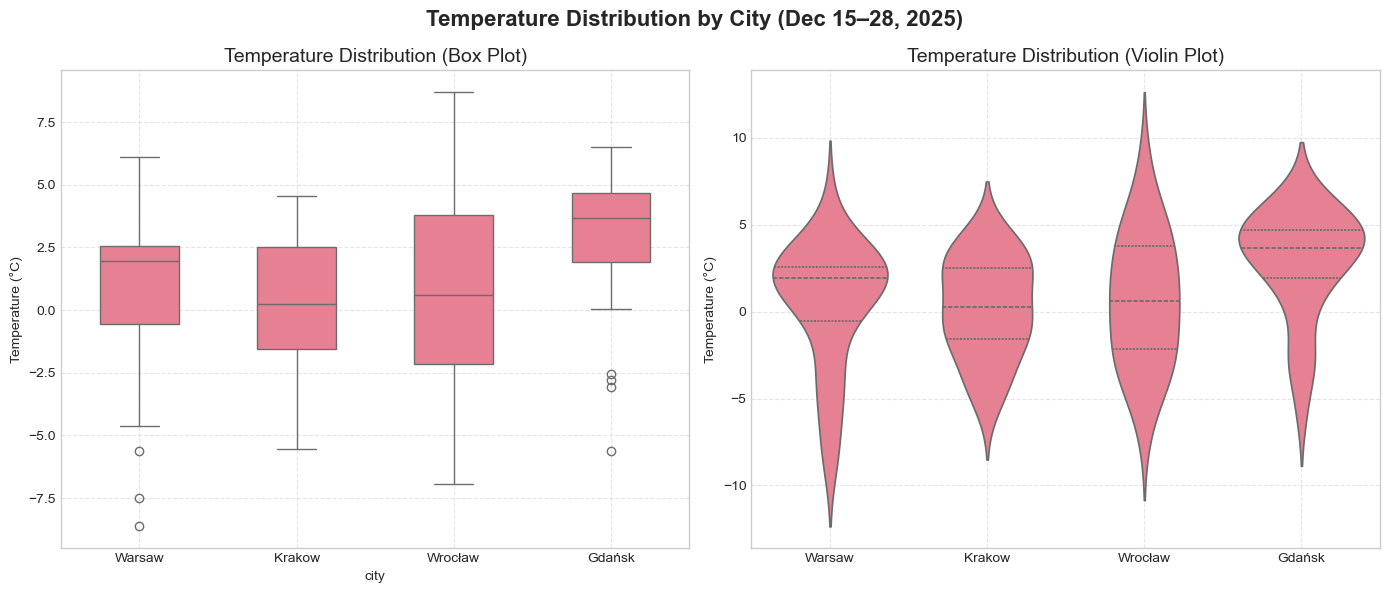

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
sns.boxplot(x='city', y='temperature', data=df, ax=ax1, width=0.5)
ax1.set_title('Temperature Distribution (Box Plot)', fontsize=14)
ax1.set_ylabel('Temperature (°C)')

# Violin Plot
sns.violinplot(x='city', y='temperature', data=df, ax=ax2, inner='quartile')
ax2.set_title('Temperature Distribution (Violin Plot)', fontsize=14)
ax2.set_ylabel('Temperature (°C)')
ax2.set_xlabel('')

for ax in [ax1, ax2]:
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Temperature Distribution by City (Dec 15–28, 2025)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

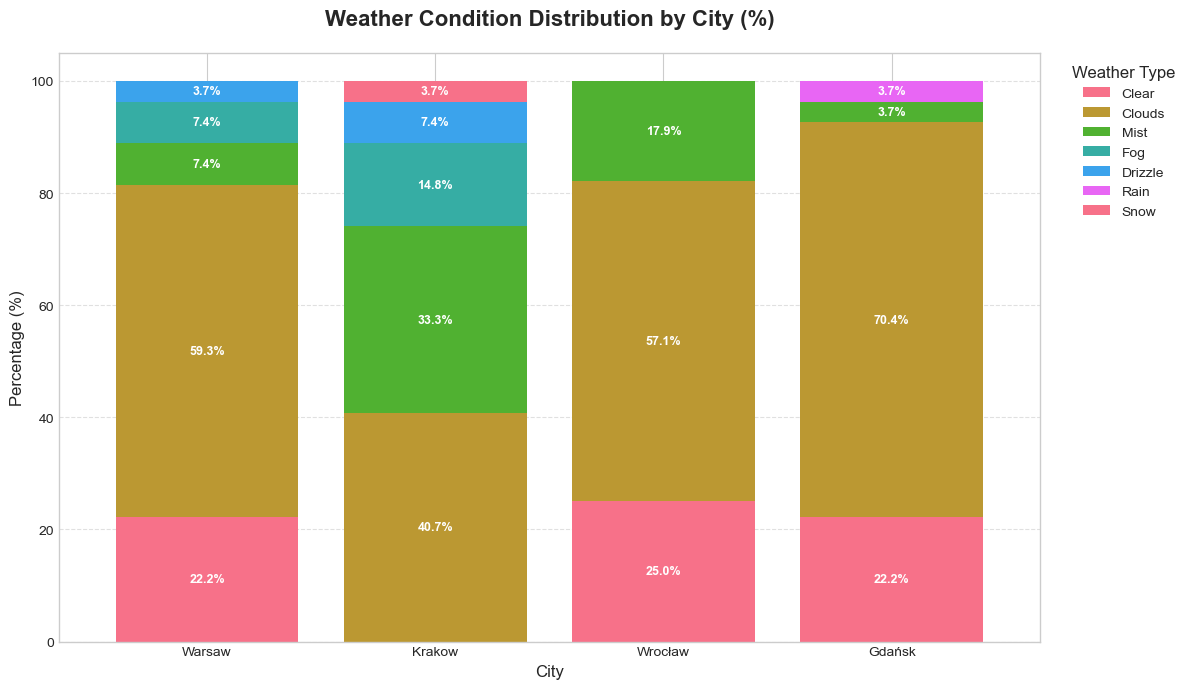

In [92]:
weather_dist = df.groupby(['city', 'weather_main']).size().unstack(fill_value=0)
weather_pct = weather_dist.div(weather_dist.sum(axis=1), axis=0) * 100

weather_pct = weather_pct.reindex(index=['Warsaw', 'Krakow', 'Wrocław', 'Gdańsk'])
weather_types = ['Clear', 'Clouds', 'Mist', 'Fog', 'Drizzle', 'Rain', 'Snow']
weather_pct = weather_pct.reindex(columns=weather_types, fill_value=0)

fig, ax = plt.subplots(figsize=(12, 7))

weather_pct.plot(kind='bar', stacked=True, ax=ax, width=0.8)

ax.set_title('Weather Condition Distribution by City (%)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(title='Weather Type', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, title_fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6, axis='y')

for i, city in enumerate(weather_pct.index):
    cumulative = 0
    for j, value in enumerate(weather_pct.loc[city]):
        if value > 3:  
            ax.text(i, cumulative + value/2, f'{value:.1f}%', ha='center', va='center', 
                    fontsize=9, color='white', fontweight='bold')
        cumulative += value

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()